In [ ]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import numpy as np

In [ ]:
net = cv2.dnn.readNet('/content/yolov3-tiny.weights', '/content/yolov3.txt')

In [ ]:
img = cv2.imread('/content/img.jfif')
height, width, _ = img.shape

In [ ]:
classes = []
with open('/content/coco.txt', 'r') as f:
  classes = f.read().splitlines()

In [ ]:
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
blob = cv2.dnn.blobFromImage(img, 1, (416, 416), (0,0,0), swapRB = True, crop = False)

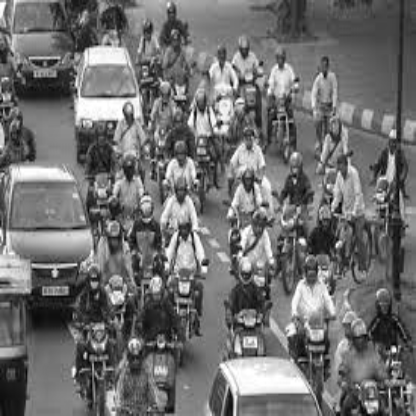

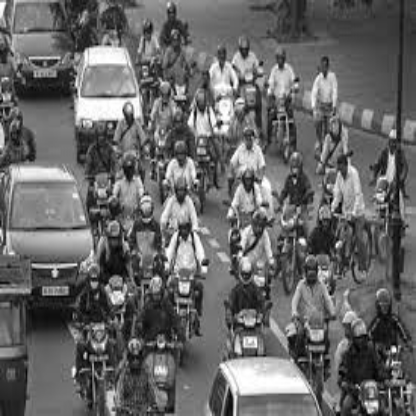

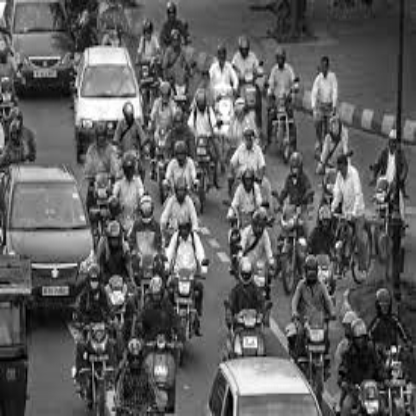

In [ ]:
for b in blob:
  for n, img_blob in enumerate(b):
    cv2_imshow(img_blob)

In [ ]:
net.setInput(blob)

In [ ]:
# output_layers_names = net.getUnconnectedOutLayersNames()
layerOutputs = net.forward(output_layers)

In [ ]:
boxes = []
confidences = []
class_ids = []

In [ ]:
for output in layerOutputs:
  for detection in output:
    scores = detection[5:]
    class_id = np.argmax(scores)
    confidence = scores[class_id]
    if confidence > 0.5:
      center_x = int(detection[0]*width)
      center_y = int(detection[1]*height)
      w = int(detection[2]*width)
      h = int(detection[3]*height)

      x = int(center_x - w/2)
      y = int(center_y - h/2)

      boxes.append([x,y,w,h])
      confidences.append((float(confidence)))
      class_ids.append(class_id)


In [ ]:
print(len(boxes))
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
print(indexes)

0
()


In [ ]:
index_coco=[0,1,2,3,4,5,6,7,10,12]
font = cv2.FONT_HERSHEY_PLAIN

In [ ]:
labels = []

In [ ]:
for i in range(len(boxes)):
  for i in indexes:
    x, y, w, h = boxes[i]
    if(class_ids[i]>=0 and class_ids[i]<=12 and class_ids!=8):
      label = str(classes[class_ids[i]])
      confidence = str(round(confidences[i],2))
      color = colors[class_ids[i]]
      cv2.rectangle(img, (x,y), (x+w, y+h), color, 6)
      cv2.putText(img, label + " " + confidence, (x, y+20), font, 2, (255,255,255), 2)

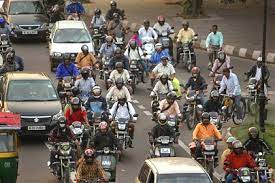

In [ ]:
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

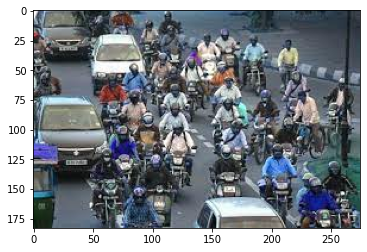

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()